# Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Описание данных

Перед нами данные по продажам компьютерных игр с 1980 по 2016 год (за 2016 год могут быть неполными).

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.



# Задача

Необходимо провести исследование данных с целью выявить наиболее популярные платформы, игры, жанры для последующего планирования рекламной кампании на 2017 год. 

# План работы:

Шагом 1 будет изучение данных. Необходимо познакомиться с данными.<br>
Шагом 2 будет подготовка данных к обработке. Обработка пропусков, привидение данных в удобный вид.<br>
Шагом 3 будет исследование данных. Необходимо будет выбрать актуальный период для работы. Затем выбрать несколько потенциально интересных платформ. Посмотреть зависимость продаж от отзывов. Посмотреть на общее распределение игр по жанрам.<br>
Шагом 4 будет составление портрета пользователя по каждому региону. Определение наиболее популярных платформ и жанров. Исследование зависимости продаж от рейтинга ESRB.<br>
Шагом 5 будет проверка двух гипотез. Необходимо сформулировать основные и альтернативные гипотезы. Провести их проверку.<br>
Шагом 6 будет вывод.<br>

## Шаг 1. Изучение общей информации.

In [1]:
# загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
# Загрузка данных
df = pd.read_csv('/datasets/games.csv')

# просмотр первых строк
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# Просмотр информации по столбцам.
df.info()

# Вывод на экран в процентах количества пропущенных строк.
(df.isna().mean()*100).round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name                0.01
Platform            0.00
Year_of_Release     1.61
Genre               0.01
NA_sales            0.00
EU_sales            0.00
JP_sales            0.00
Other_sales         0.00
Critic_Score       51.32
User_Score         40.09
Rating             40.48
dtype: float64

In [4]:
# Поиск дубликатов.
print(df.duplicated().sum())

0


По первым строкам мы видим несколько проблем с данными.<br>
Необходимо привести названия столбцов в нижний регистр, обработать пропуски в 6 столбцах, привести колонки в более логичный формат.
<br> Явных дубликатов нет.

## Шаг 2. Подготовка данных.

In [5]:
# Приведение к нижнему регистру.
df.columns = df.columns.str.lower()

# Приведение к нижнему регистру.
df['name'] =  df['name'].str.lower()

# Поиск дубликатов.
df.duplicated().sum()

0

In [6]:
# Удаление строк с пропущенными значениями в столбцах 'name', 'year_of_release', 'genre'
df = df.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)

In [7]:
# Изменение типа данных в столбце 'year_of_release'.
df['year_of_release'] = df['year_of_release'].astype(int)

In [8]:
# Исследование столбцов 'critic_score', 'user_score', 'rating' - подсчет количества уникальных значений.
for i in ['critic_score', 'user_score', 'rating']:
    print(f"В столбце {i} - {df[i].nunique()} уникальных значений")

В столбце critic_score - 81 уникальных значений
В столбце user_score - 96 уникальных значений
В столбце rating - 8 уникальных значений


In [9]:
# Заполнение пропущенных значений маркерами в столбце critic_score
df['critic_score'] = df['critic_score'].fillna(0)

# Замена пропущенных значений в столбце 'rating'
df['rating'] = df['rating'].fillna('SSS')

In [10]:
# Замена tbd на 0.
def ff(row):
    i = row['user_score']
    if i == 'tbd':
        return 10
    else:
        return row['user_score']
    
df['user_score'] = df.apply(ff,axis=1)

In [11]:
# Изменение типа данных в столбце 'user_score'.
df['user_score'] = df['user_score'].astype(float)

# Замена пропущенных значений в столбце 'user_score' медианой.
df['user_score'] = df['user_score'].fillna(10)

In [12]:
# Просмотр информации по столбцам.
df.info()

# Вывод на экран в процентах количества пропущенных строк.
(df.isna().mean()*100).round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64

### Подсчет суммарных продаж во всех регионах и запись их в отдельный столбец.

In [25]:
# Подсчет суммарных продаж по четырем столбцам и запись их в новый столбец 'all_sales'
df['all_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

## Шаг 3. Исследовательский анализ данных.

### Просмотр количества игр, выпущенных в разные годы. Оценка степени важности данных за все периоды.

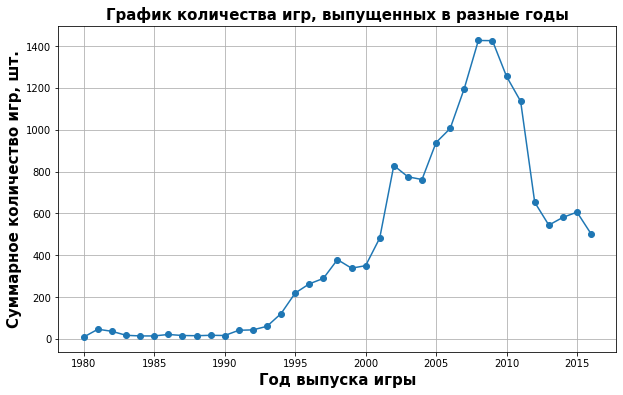

In [22]:
# Группировка по годам выпуска игр.
df.groupby('year_of_release')['name'].count().plot(style='o-', grid=True, figsize=(10, 6))

#  Добавляем подписи к осям:
plt.title('График количества игр, выпущенных в разные годы', fontsize = 15, fontweight='bold')
plt.xlabel('Год выпуска игры', fontsize = 15, fontweight='bold')
plt.ylabel('Суммарное количество игр, шт.', fontsize = 15, fontweight='bold')
plt.show()

На графике видно, что количество выпускаемых игры шло скачками. Научно технический прогресс идет всегда скачками. В 90-е уверенный рост закончился с появлением вторых пентиумов и нового виндоуса. А вот уверенный спад начался в 10-е года, когда ПК были потеснены с рынка смартфонами и планшетами. К тому же некоторые игры выпущенные в начале нулевых стали серверными. Их можно играть до сих пор. Выходят обновления под более современные параметры техники.
<br> С 2013 по 2015 год шло увеличение количества игр. В 2016 спад. Его можно объяснить тем, что мы имеем данные за не весь год. Возможно, что их будет-было выпущено не меньше чем в 2015.

### Просмотр изменения продаж по платформам.   

#### Выбор платформы с наибольшими суммарными продажами.

In [26]:
# Вычисление количества платформ.
print('КОличество платформ:', df['platform'].nunique(),'штука')

# Создание таблицы с подсчетом количества игр и продаж.
df_pl_s = pd.pivot_table(df,
                       index=["platform"],
                       values=["name", "all_sales"],
                       aggfunc={"name": 'count', "all_sales": 'sum'},
                       fill_value=0)

df_pl_s

КОличество платформ: 31 штука


,all_sales,name
platform,,
2600,86.48,116
3DO,0.10,3
3DS,257.81,512
DC,15.95,52
DS,802.78,2121
GB,254.43,97
GBA,312.88,811
GC,196.73,542
GEN,28.35,27


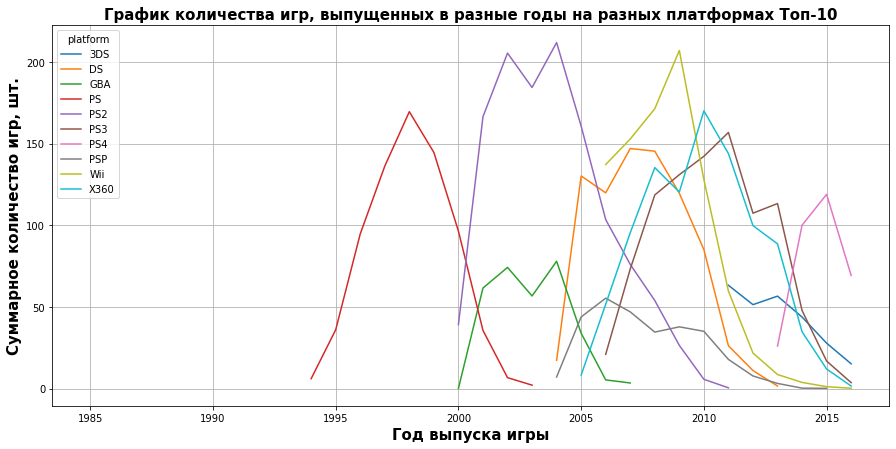

In [32]:
# Топ-10 платформ по количеству продаж.
platform_all_sales = df.pivot_table(index='platform', values='all_sales', aggfunc='sum').nlargest(10, 'all_sales').index

# Построение распределения по годам.
(
    df.query('platform in @platform_all_sales')
    .pivot_table(index = 'year_of_release', 
                 columns = 'platform', 
                 values= 'all_sales', 
                 aggfunc = 'sum')
    .plot(figsize = (15, 7), grid=True)
)
plt.title('График количества игр, выпущенных в разные годы на разных платформах Топ-10', fontsize = 15, fontweight='bold')
plt.xlabel('Год выпуска игры', fontsize = 15, fontweight='bold')
plt.ylabel('Суммарное количество игр, шт.', fontsize = 15, fontweight='bold')
plt.show()

### Выбор актуального периода.

Из построенного графика видно: платформы имеют жизненный цикл от 7 до 12 лет. 

Актуальным можно считать период с 2014 года по 2016. Так же необходимо из этого периода удалить данные по платформам, что в 2015 году перестали выпускать игры. Это позволит выделить перспективные платформы. И отсечь мертвецов.

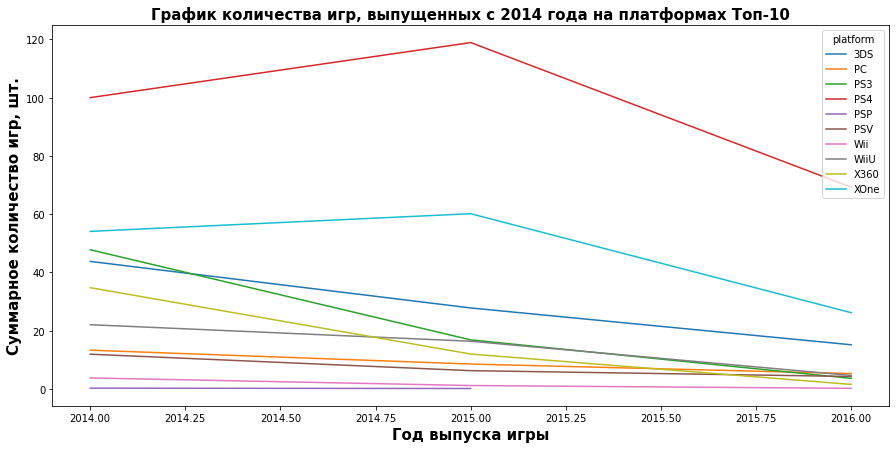

In [36]:
df_act = df.query('year_of_release > 2013')
(
    df_act.pivot_table(index = 'year_of_release', 
                 columns = 'platform', 
                 values= 'all_sales', 
                 aggfunc = 'sum')
    .plot(figsize = (15,7), grid=False)
)
plt.title('График количества игр, выпущенных с 2014 года на платформах Топ-10', fontsize = 15, fontweight='bold')
plt.xlabel('Год выпуска игры', fontsize = 15, fontweight='bold')
plt.ylabel('Суммарное количество игр, шт.', fontsize = 15, fontweight='bold')
plt.show()

### Выбор потенциально прибыльных платформ.

Потенциально прибыльные платформы должны иметь продажи в 2015 и 2016 годах на высоком уровне. <br>
Отдельно имеет смысл рассмотреть платформы, что в 2016 только появились. Если параметры прадаж будут на приличном уровне, можно их добавить к числу перспективных. Но поскольку у нас нет полных данных за 2016 год, эту часть исследования сделать невозможно!
<br> По количеству продаж за 2015 и 2016 год лидируют платформы PS4 и XOne. Это лидеры №1 и №2. Свежие фирмы, появившиеся в 2013 году. Они потеснили с рынка остальных игроков. В том числе 3DS, PS3 и X360. Возможно, что в 2016 по итогам года продажи PS3 и X360 возрастут и они вернутся в пятерку лидеров. Но пока что №3 это 3DS, №4 - PC, №5 - WiiU. В 2015 продажи WiiU были сравнимы с PS3 и больше чем у X360. Продажи PC стабильно низкие с уменьшением.
<br> По итогам последних трех лет самыми перспективными являются PS4 и XOne, а 3DS имеет потенциал для роста, но его реализация под вопросом.

In [38]:
top_platforms = ['PS4', 'XOne', '3DS', 'PC', 'WiiU']

### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

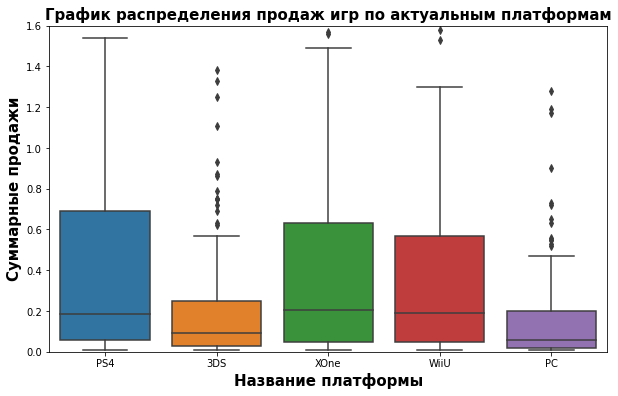

In [41]:
# Выбор актуальных платформ.
df_act_platfom = df_act.loc[df_act['platform'].isin(top_platforms)]

# Построение графика
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_act_platfom, x='platform', y='all_sales')
plt.title('График распределения продаж игр по актуальным платформам', fontsize = 15, fontweight='bold')
plt.xlabel('Название платформы', fontsize = 15, fontweight='bold')
plt.ylabel('Суммарные продажи', fontsize = 15, fontweight='bold')
plt.ylim(0, 1.6)
plt.show()

Из полученного графика видно, что есть выбивающиеся значения. Но основной костяк находится для всех платформ в примерно одном диапазоне. 
Медианные значения различных платформ сильно отличаются.<br>
PS4 и XOne лидеры рынка имеют медианы около 0,2. Второй квартиль 0,69 и 0,63 соответственно. <br>
WiiU примерно там же по медиане, но второй квартиль на уровне 0,6.<br>
3DS имеет 75% продаж на уровне до 0,23. Медиана 0,1<br>
РС имеет 75% продаж на уровне до 0,2. Медиана 0,07<br>
Диаграмма размаха показала двух явных лидеров рынка - PS4 и XOne. А вот на третьем месте неожиданно оказалась WiiU.<br>

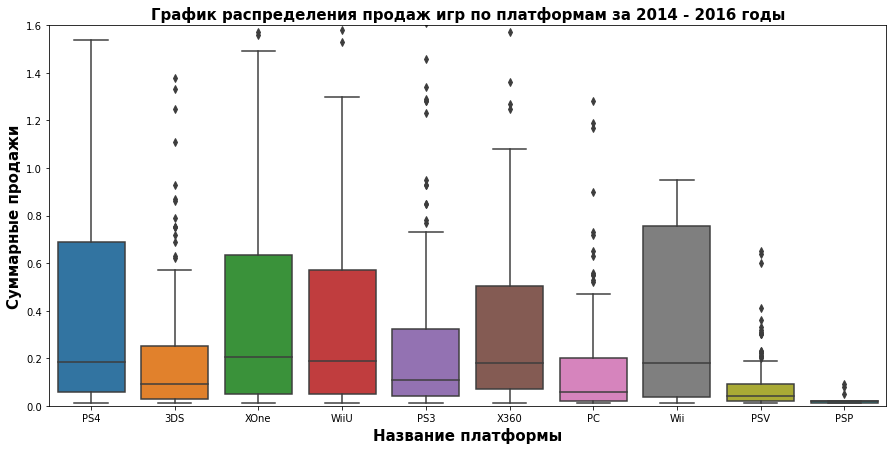

In [44]:
flg, axes = plt.subplots(figsize = (15,7))
sns.boxplot(data=df_act, x='platform', y='all_sales')
plt.title('График распределения продаж игр по платформам за 2014 - 2016 годы', fontsize = 15, fontweight='bold')
plt.xlabel('Название платформы', fontsize = 15, fontweight='bold')
plt.ylabel('Суммарные продажи', fontsize = 15, fontweight='bold')
plt.ylim(0, 1.6)
plt.show()

### Оценка влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы.

In [45]:
#  Избавление от маркеров.
df = df.query('critic_score > 0 and user_score < 10')

# Выделение данных только по платформе XOne.
df_xone = df.loc[df['platform'] == 'XOne']

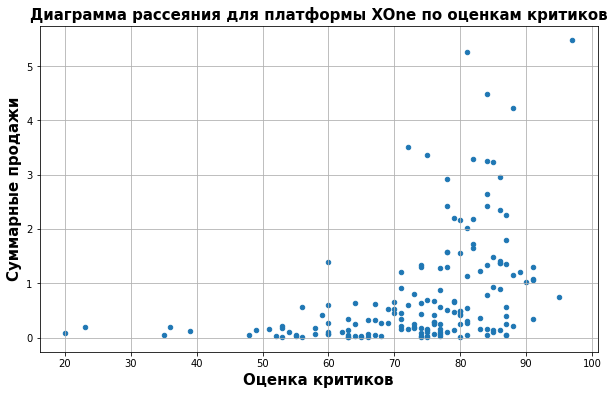

In [47]:
# Построение диаграммы рассеяния по оценкам критиков.
df_xone.plot(x='critic_score', y='all_sales', kind='scatter', grid=True, figsize = (10, 6))
plt.title('Диаграмма рассеяния для платформы XOne по оценкам критиков', fontsize = 15, fontweight='bold')
plt.xlabel('Оценка критиков', fontsize = 15, fontweight='bold')
plt.ylabel('Суммарные продажи', fontsize = 15, fontweight='bold')
plt.show()

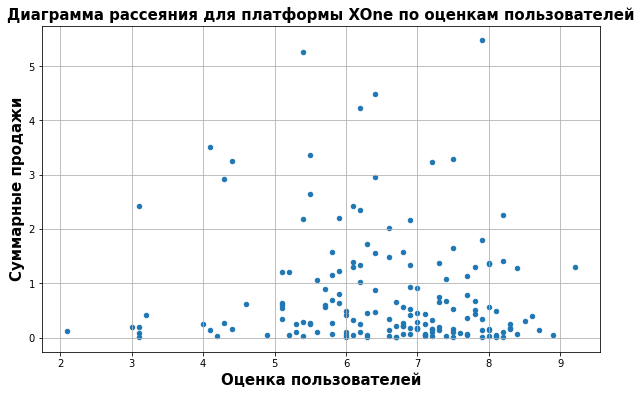

In [48]:
# Построение диаграммы рассеяния по оценкам пользователей.
df_xone.plot(x='user_score', y='all_sales', kind='scatter', grid=True, figsize = (10, 6))
plt.title('Диаграмма рассеяния для платформы XOne по оценкам пользователей', fontsize = 15, fontweight='bold')
plt.xlabel('Оценка пользователей', fontsize = 15, fontweight='bold')
plt.ylabel('Суммарные продажи', fontsize = 15, fontweight='bold')
plt.show()

На графиках мы видим:
- игры с высоким рейтингом и высокими продажами,
- игры с низким рейтингом и низкими продажами,
- игры с высоким рейтингом и низкими продажами,
- игры с низким рейтингом и средними продажами.

Оценки критиков больше смещены к высоким значениям, чем оценки пользователей. Из этого делаем вывод: оценка критиков у большего количества игр выше чем у пользователей. <br>
Влияние оценок на уровень продаже не однозначна. Четкой корреляции между ними нет.

### Соотношение выводов с продажами игр на других платформах.

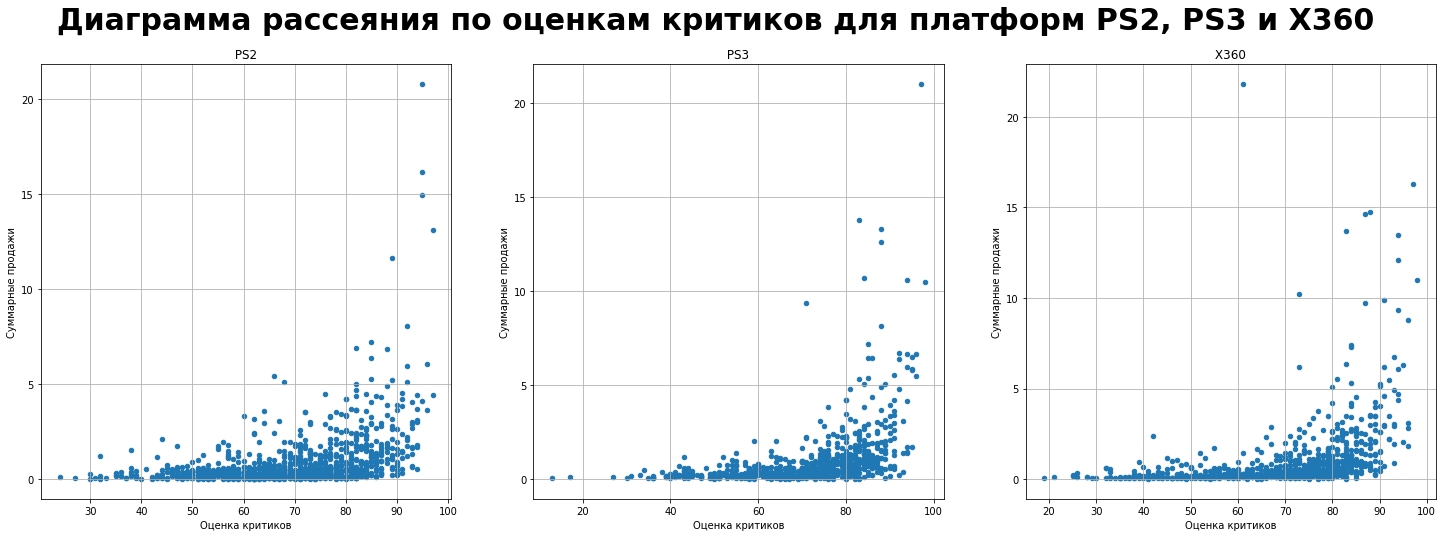

In [82]:
# Построение диаграммы рассеяния по оценкам критиков для платформ 'PS2', 'PS3' и 'X360'.
#
def graph (platform, axes):
    
    df.loc[df['platform'] == platform].plot(x='critic_score',
                                            y='all_sales', 
                                            kind='scatter', 
                                            grid=True,
                                            title=f" {platform} ",
                                            xlabel='Оценка критиков',
                                            ylabel='Суммарные продажи',
                                            ax = axes)
    
# 
fig, axes = plt.subplots(1, 3, figsize = (25, 8))
fig.suptitle('Диаграмма рассеяния по оценкам критиков для платформ PS2, PS3 и X360', 
             fontsize = 30, 
             fontweight='bold')

graph('PS2', axes[0])
graph('PS3', axes[1])
graph('X360', axes[2])
plt.show()

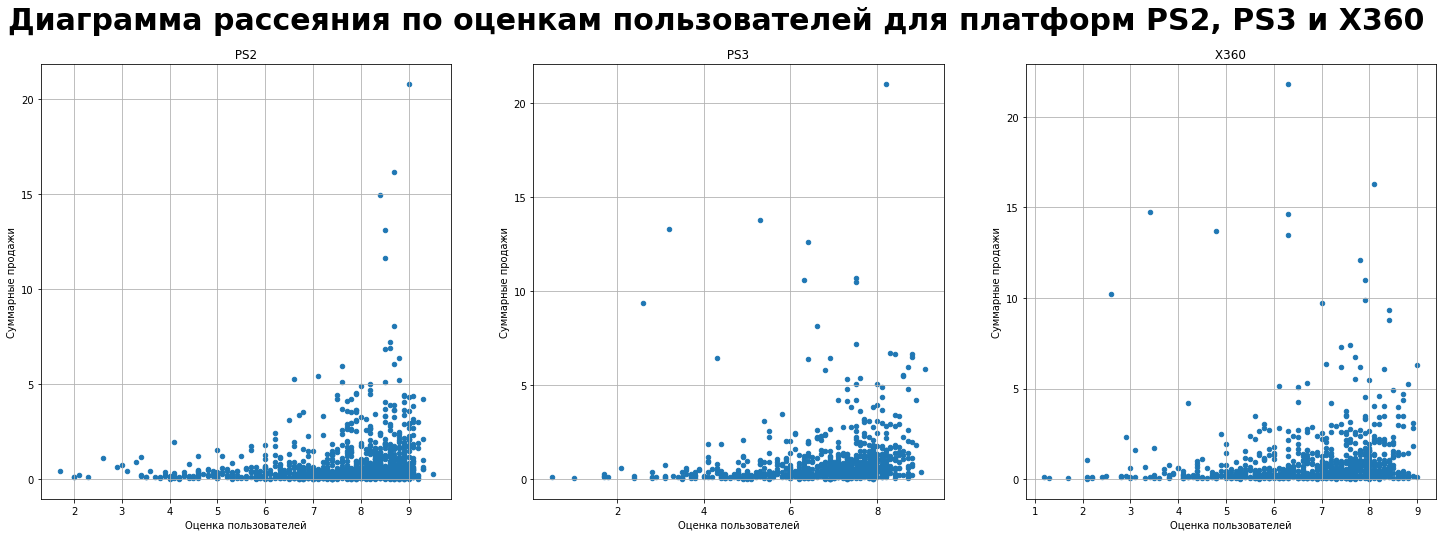

In [81]:
# Построение диаграммы рассеяния по оценкам пользователей для платформ 'PS2', 'PS3' и 'X360'.
#
def graph (platform, axes):
    
    df.loc[df['platform'] == platform].plot(x='user_score',
                                            y='all_sales', 
                                            kind='scatter', 
                                            grid=True,
                                            title=f" {platform} ",
                                            xlabel='Оценка пользователей',
                                            ylabel='Суммарные продажи',
                                            ax = axes)
    
# 
fig, axes = plt.subplots(1, 3, figsize = (25, 8))
fig.suptitle('Диаграмма рассеяния по оценкам пользователей для платформ PS2, PS3 и X360', 
             fontsize = 30, 
             fontweight='bold')

graph('PS2', axes[0])
graph('PS3', axes[1])
graph('X360', axes[2])
plt.show()

Графики для платформ PS2, PS3 и X360 похожи на графики для платформа XOne.

### Обзор общего распределения игр по жанрам.  

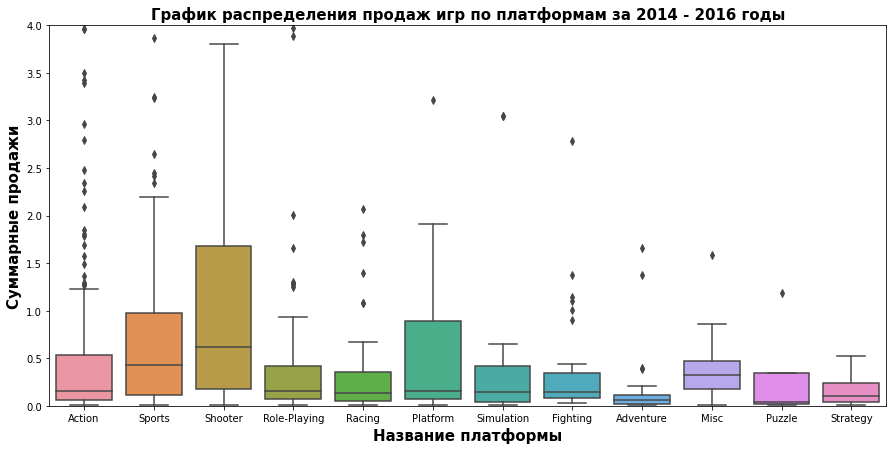

In [84]:
flg, axes = plt.subplots(figsize = (15,7))
sns.boxplot(data=df.query('year_of_release > 2013'), x='genre', y='all_sales')
plt.title('График распределения продаж игр по жанрам за 2014 - 2016 годы', fontsize = 15, fontweight='bold')
plt.xlabel('Жанр', fontsize = 15, fontweight='bold')
plt.ylabel('Суммарные продажи', fontsize = 15, fontweight='bold')
plt.ylim(0, 4)
plt.show()

Самым прибыльным жанром является Shooter. На втором месте Sports и Platform, причем у Platform медиана вдвое меньше чем у Sports.<br>
Хуже всего продаются Adventure и Strategy.

## Шаг 4. Составление портрета пользователя каждого региона.

### Определение для пользователя каждого региона (NA, EU, JP) самых популярных платформ (топ-5). 

In [86]:
def graph_reg (df, region, name, axes):
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, labels = sales.platform,
               
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    plt.tight_layout()

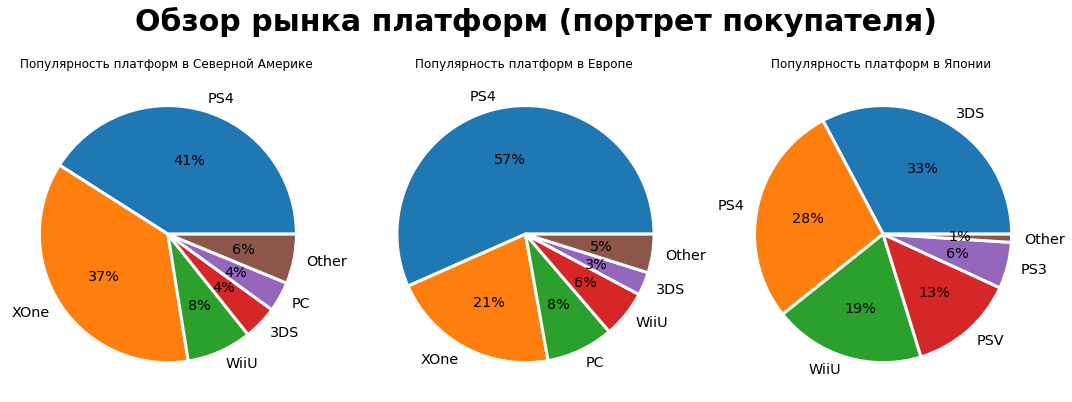

In [89]:
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

graph_reg(df.query('year_of_release > 2013'), 'na_sales', 'Северной Америке', axes[0])
graph_reg(df.query('year_of_release > 2013'), 'eu_sales', 'Европе', axes[1])
graph_reg(df.query('year_of_release > 2013'), 'jp_sales', 'Японии', axes[2])

Платформы 3DS, PS4, WiiU есть во всех трех регионах.<br>
Европа и США имеют 5 общих платформ. Доля 'Других' платформ мала.<br>
А вот Япония имеет только 3 общие платформы с другими регионами. Доля 'Других' платформ очень мала.

### Определение для пользователя каждого региона (NA, EU, JP) Самых популярных жанров (топ-5). 

In [92]:
def graph_gen (df, region, name, axes):
    
    sales = df.pivot_table(index='genre', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'genre': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['genre', 'sales']
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, labels = sales.genre,
               
               legend=False, 
               title = f"Популярность жанров в {name} ", 
               ax = axes).set(ylabel='')
    plt.tight_layout()

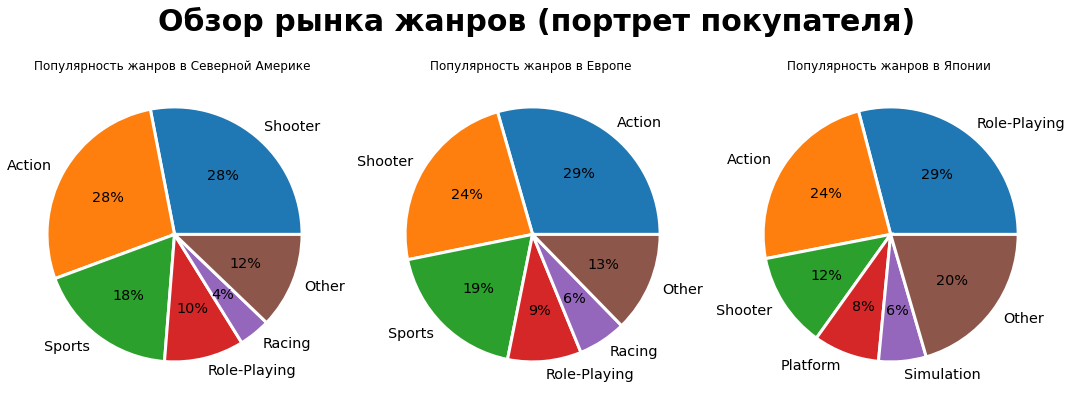

In [93]:
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка жанров (портрет покупателя)', fontsize = 30, fontweight='bold')

graph_gen(df.query('year_of_release > 2013'), 'na_sales', 'Северной Америке', axes[0])
graph_gen(df.query('year_of_release > 2013'), 'eu_sales', 'Европе', axes[1])
graph_gen(df.query('year_of_release > 2013'), 'jp_sales', 'Японии', axes[2])

Три жанра повторяется в каждом регионе. Это Action, Role-Playing, Shooter.<br>
Европа и Северная Америка имеют общими 5 жанров. <br>
Япония только 3 жанра имеет общими с Европой и Северной Америкой.<br>
Во всех трех регионах другие жанры имеют существенный вес.<br>

### Оценка влияния рейтинга ESRB на продажи в отдельном регионе.

In [94]:
# Оценка влияния рейтинга ESRB на продажи.
df.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales',], aggfunc='sum')

,eu_sales,jp_sales,na_sales
rating,,,
AO,0.61,0.00,1.26
E,590.78,190.67,986.02
E10+,155.94,38.81,286.03
K-A,0.16,1.46,0.26
M,467.07,62.28,724.61
RP,0.03,0.00,0.00
SSS,5.35,2.42,2.59
T,396.82,144.66,694.23


В Японии: <br>
Больше всего игр без рейтинга. Это не удивительно. Ведь это агентство там не работает. Соответственно игры для этой страны не надо как-то категоризировать. На втором месте после марекров (SSS) рейтинг Е на третьем Т. Игры для всех и игры для тинейджеров.<br>
Е10+ как ограничение рейтинга Е на четвертом месте.<br>
АО, ЕС, RP не имеют продаж совсем. <br>
К-А совсем мало.<br>

В Европе:<br>
Больше всего игр рейтинга Е.<br>
На втором месте маркированные игры без рейтинга(SSS).<br>
На третьем месте рейтинг М и на четвертом Т.<br>
АО, ЕС, RP, К-А представлены очень слабо. <br>
Игры для детей от 10 лет(рейтинг Е10+) на пятом месте.<br>

В Северной Америке ситуация очень похожа с Европой. Только объемы продаж больше.

## Шаг 5. Проверка гипотез.

1. Нулевая гипотеза: Средние значения двух генеральных совокупностей пользовательских рейтингов платформ XOne и PC одинаковые.<br>
Альтернативная гипотеза от обратного: Средние значения двух генеральных совокупностей пользовательских рейтингов платформ XOne и PC разные.<br>
Пороговое значение alpha 0.05<br>
Эти две платформы имеют довольно большое количество игр. Соответственно и отзывов пользователей. Можно смело утверждать, что выборки достаточно большие для проведения t-теста. Для проверки выбираем сравнить средние значения двух генеральных совокупностей.<br>
Выборки разного размера. Их дисперсии будут разные. Это надо учесть при проведении теста.<br>
Так же важно в данных удалить значения, что ранее были пропусками и меркерами.<br>

In [95]:
xone = df_act['user_score'].loc[(df_act['platform'] == 'XOne')&(df_act['user_score'] != 10)]
pc = df_act['user_score'].loc[(df_act['platform'] == 'PC')&(df_act['user_score'] != 10)]
 
alpha = 0.05 # критический уровень статичтической значимости
 
results = st.ttest_ind(
    xone,
    pc,
    equal_var=False)
 
print('p-значение:', results.pvalue)
 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668835
Не удалось отвергнуть нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее различие равно почти 11,6%
Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами.

2. Нулевая гипотеза: Средние значения двух генеральных совокупностей пользовательских рейтингов жанров Action и Sports одинаковые.<br>
Альтернативная гипотеза от обратного: Средние значения двух генеральных совокупностей пользовательских рейтингов  жанров Action и Sports разные.<br>
Пороговое значение alpha 0.05<br>
Эти два жанра имеют довольно большое количество игр. Соответственно и отзывов пользователей. Можно смело утверждать, что выборки достаточно большие для проведения t-теста. Для проверки выбираем сравнить средние значения двух генеральных совокупностей. Если они не равны, принимаем нулевую гипотезу.<br>
Выборки разного размера. Их дисперсии будут разные. Это надо учесть при проведении теста.<br>
Так же важно в данных удалить значения, что ранее были пропусками и меркерами.<br>

In [96]:
action = df_act['user_score'].loc[(df_act['genre'] == 'Action')&(df_act['user_score'] != 10)]
sports = df_act['user_score'].loc[(df_act['genre'] == 'Sports')&(df_act['user_score'] != 10)]
 
alpha = .05 # критический уровень статичтической значимости
 
results = st.ttest_ind(
    action,
    sports,
    equal_var=False)
 
print('p-значение:', results.pvalue)
 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


### Выводы.

Гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые не удалось отвергнуть.<br>
Гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные не удалось отвергнуть.


## Шаг 6. Общий вывод по проекту.

Интернет-магазину, который продаёт по всему миру компьютерные игры, нужно было выявить определяющие успешность игры закономерности. Это позволило бы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<br> В ходе исследования это удалось сделать.
<br> После обработки данных был проведен исследовательский анализ. Рассмотрена зависимость продаж по регионам, жанрам, платформам. Был выделен срез данных, на основе которого проведен более детальный анализ перспективных платформ.
<br> По жанрам и платформам был сформулирован портрет основного покупателя по регионам.
<br> В статистическом анализе проверены гипотезы о равенстве пользовательских рейтингов жанров и нескольких платформ.
Самыми популярными являются платформы 3DS, PS4, WiiU, XOne.<br>
Самыми популярными жанрами являются Action, Role-Playing, Shooter.<br>
Они представлены в наибольшем количестве.<br>